In [1]:
# Import libraries to be used

# Warning messages display
## import warnings
## warnings.filterwarnings(action='ignore') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Memory monitoring
%load_ext memory_profiler
### Use '%memit' to check at each point

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
## pd.set_option('display.max_rows', None) # It greatly slows down the output display and freezes the kernel

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
t0 = time.perf_counter() 

In [3]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


Additional information on each column meaning can be found [here](https://www.ncei.noaa.gov/data/local-climatological-data/doc/LCD_documentation.pLCD).

___

# Get the data

## LCD individual file (2019)

### Import file

#### Define file path

In [4]:
csv_files_path = os.path.join(root,
                              "Output_Data",
                              "NOAA",
                              "LCD_files")
csv_files_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files'

In [5]:
individualLCLCDileName = "ABE_14737.csv"
individualLCLCDileNamePath = os.path.join(csv_files_path, individualLCLCDileName)
individualLCLCDileNamePath

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ABE_14737.csv'

#### Select the interesting columns

In [6]:
cols = [
 'STATION', # Station ID (VMO+WBAN)
 'DATE', # Date: YYYY-MM-DD format / Time: 24-hour clock in local standard time (LST)
 'LATITUDE',
 'LONGITUDE',
#  'ELEVATION',
#  'NAME',
#  'REPORT_TYPE',
#  'SOURCE',
 'HourlyAltimeterSetting', # Atmospheric pressure reduced to sea level using temperature profile of the “standard” atmosphere
#  'HourlyDewPointTemperature',
 'HourlyDryBulbTemperature', # Commonly used as the standard air temperature reported (given in whole degrees Fahrenheit)
 'HourlyPrecipitation', # Amount of precipitation in inches to hundredths over the past hour (“T” indicates a trace amount)
#  'HourlyPresentWeatherType',
#  'HourlyPressureChange',
#  'HourlyPressureTendency',
 'HourlyRelativeHumidity', # Relative humidity given to the nearest whole percentage
 'HourlySkyConditions', # A report of each cloud layer (up to 3).Each layer given in the following format: ccc:ll-xxx where:
                         ## ccc = Coverage: CLR (clear sky), FEW (few clouds), SCT (scattered clouds), BKN (broken clouds),
                         ##                 OVC (overcast), VV (obscured sky), 10 (partially obscured sky) → Last layer used (*)
                         ##  ll = Layer amount given in eighths (aka “oktas”) → Not used
                         ## xxx = Cloud base height at lowest point of layer → Not used   
                             ## (*) NOTE: Since up to 3 cloud layers can be reported, the full state of the sky 
                             ##           can best be determined by the contraction given for the last layer
#  'HourlySeaLevelPressure',
#  'HourlyStationPressure',
 'HourlyVisibility', # Horizontal distance an object can be seen and identified given in whole miles
#  'HourlyWetBulbTemperature',
 'HourlyWindDirection', # wind direction/speed/gust variables would be useful in case RWY Magnetic Heading was also available
 'HourlyWindGustSpeed',   # without it, there is no use for it. Strong crosswinds can greatly penalize A/C performance;
 'HourlyWindSpeed',       # however, RWYs are normally designed so that headwind prevails to improve A/C performance
#  'Sunrise',
#  'Sunset',
#  'DailyAverageDewPointTemperature',
#  'DailyAverageDryBulbTemperature',
#  'DailyAverageRelativeHumidity',
#  'DailyAverageSeaLevelPressure',
#  'DailyAverageStationPressure',
#  'DailyAverageWetBulbTemperature',
#  'DailyAverageWindSpeed',
#  'DailyCoolingDegreeDays',
#  'DailyDepartureFromNormalAverageTemperature',
#  'DailyHeatingDegreeDays',
#  'DailyMaximumDryBulbTemperature',
#  'DailyMinimumDryBulbTemperature',
#  'DailyPeakWindDirection',
#  'DailyPeakWindSpeed',
#  'DailyPrecipitation',
#  'DailySnowDepth',
#  'DailySnowfall',
#  'DailySustainedWindDirection',
#  'DailySustainedWindSpeed',
#  'DailyWeather',
#  'MonthlyAverageRH',
#  'MonthlyDaysWithGT001Precip',
#  'MonthlyDaysWithGT010Precip',
#  'MonthlyDaysWithGT32Temp',
#  'MonthlyDaysWithGT90Temp',
#  'MonthlyDaysWithLT0Temp',
#  'MonthlyDaysWithLT32Temp',
#  'MonthlyDepartureFromNormalAverageTemperature',
#  'MonthlyDepartureFromNormalCoolingDegreeDays',
#  'MonthlyDepartureFromNormalHeatingDegreeDays',
#  'MonthlyDepartureFromNormalMaximumTemperature',
#  'MonthlyDepartureFromNormalMinimumTemperature',
#  'MonthlyDepartureFromNormalPrecipitation',
#  'MonthlyDewpointTemperature',
#  'MonthlyGreatestPrecip',
#  'MonthlyGreatestPrecipDate',
#  'MonthlyGreatestSnowDepth',
#  'MonthlyGreatestSnowDepthDate',
#  'MonthlyGreatestSnowfall',
#  'MonthlyGreatestSnowfallDate',
#  'MonthlyMaxSeaLevelPressureValue',
#  'MonthlyMaxSeaLevelPressureValueDate',
#  'MonthlyMaxSeaLevelPressureValueTime',
#  'MonthlyMaximumTemperature',
#  'MonthlyMeanTemperature',
#  'MonthlyMinSeaLevelPressureValue',
#  'MonthlyMinSeaLevelPressureValueDate',
#  'MonthlyMinSeaLevelPressureValueTime',
#  'MonthlyMinimumTemperature',
#  'MonthlySeaLevelPressure',
#  'MonthlyStationPressure',
#  'MonthlyTotalLiquidPrecipitation',
#  'MonthlyTotalSnowfall',
#  'MonthlyWetBulb',
#  'AWND',
#  'CDSD',
#  'CLDD',
#  'DSNW',
#  'HDSD',
#  'HTDD',
#  'NormalsCoolingDegreeDay',
#  'NormalsHeatingDegreeDay',
#  'ShortDurationEndDate005',
#  'ShortDurationEndDate010',
#  'ShortDurationEndDate015',
#  'ShortDurationEndDate020',
#  'ShortDurationEndDate030',
#  'ShortDurationEndDate045',
#  'ShortDurationEndDate060',
#  'ShortDurationEndDate080',
#  'ShortDurationEndDate100',
#  'ShortDurationEndDate120',
#  'ShortDurationEndDate150',
#  'ShortDurationEndDate180',
#  'ShortDurationPrecipitationValue005',
#  'ShortDurationPrecipitationValue010',
#  'ShortDurationPrecipitationValue015',
#  'ShortDurationPrecipitationValue020',
#  'ShortDurationPrecipitationValue030',
#  'ShortDurationPrecipitationValue045',
#  'ShortDurationPrecipitationValue060',
#  'ShortDurationPrecipitationValue080',
#  'ShortDurationPrecipitationValue100',
#  'ShortDurationPrecipitationValue120',
#  'ShortDurationPrecipitationValue150',
#  'ShortDurationPrecipitationValue180',
 'REM', # Surface Weather Observations & Reports (METAR)
#  'BackupDirection',
#  'BackupDistance',
#  'BackupDistanceUnit',
#  'BackupElements',
#  'BackupElevation',
#  'BackupEquipment',
#  'BackupLatitude',
#  'BackupLongitude',
#  'BackupName',
#  'WindEquipmentChangeDate'
]

Selected columns:

- `STATION` → Station ID (VMO+WBAN)  
- `DATE` → Date: YYYY-MM-DD format / Time: 24-hour clock in local standard time (LST)  
- `HourlyAltimeterSetting` → Atmospheric pressure reduced to sea level using temperature profile of the “standard” atmosphere  
- `HourlyDryBulbTemperature` → Commonly used as the standard air temperature reported (given in whole degrees Fahrenheit)  
- `HourlyPrecipitation` → Amount of precipitation in inches to hundredths over the past hour (“T” indicates a trace amount)   
- `HourlyRelativeHumidity` → Relative humidity given to the nearest whole percentage  
- `HourlySkyConditions` → A report of each cloud layer (up to 3).  
Each layer given in the following format: `ccc:ll-xxx` where:
    - ccc = Coverage:
        - CLR (clear sky)
        - FEW (few clouds)
        - SCT (scattered clouds)
        - BKN (broken clouds)
        - OVC (overcast)
        - VV (obscured sky)
        - 10 (partially obscured sky) → **Only last layer used (*)**
    - ll = Layer amount given in eighths (aka “oktas”) → *Not used*
    - xxx = Cloud base height at lowest point of layer → *Not used*  
    (*) NOTE: Since up to 3 cloud layers can be reported, the full state of the sky can best be determined by the contraction given for the last layer.
- `HourlyVisibility` → Horizontal distance an object can be seen and identified given in whole miles
- `HourlyWindGustSpeed` → Given in miles per hour (mph)
- `HourlyWindDirection` → Given using a 360 degree compass indicating the direction from which the wind was blowing with respect to true north e.g. 360 = true north, 180 = south, 270 = west, etc.). Note: A direction of “000” is given for calm winds.
- `HourlyWindSpeed` → Given in miles per hour (mph)
- `REM` → Surface Weather Observations & Reports (METAR)
    
Additional note for **wind**:  

Wind direction/speed/gust variables would be useful in case RWY Magnetic Heading was also available; without it, there is no use for the wind in the model. Strong crosswinds can greatly penalize A/C performance; however, RWYs are normally designed so that headwind prevails to improve A/C performance. Therefore, such type of winds should be unusual on average.

#### Import file (retrieving only the selected columns)

In [7]:
lcd = pd.read_csv(individualLCLCDileNamePath,
                  encoding='latin1',
                  usecols=cols,
                  low_memory = False)
lcd.sample(5)

,STATION,DATE,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
8134,72517014737,2019-08-11T17:51:00,40.64985,-75.44771,30.00,80.0,0.00,39.0,FEW:02 65,10.00,320,NaN,7.0,MET09908/11/19 17:51:02 METAR KABE 112251Z 320...
11421,72517014737,2019-11-11T20:51:00,40.64985,-75.44771,29.85,52.0,0.00,64.0,CLR:00,10.00,000,NaN,0.0,MET09011/11/19 20:51:01 METAR KABE 120151Z 000...
2682,72517014737,2019-03-14T20:51:00,40.64985,-75.44771,29.99,60.0,0.00,60.0,CLR:00,10.00,170,17.0,9.0,MET09303/14/19 20:51:01 METAR KABE 150151Z 170...
1281,72517014737,2019-02-06T18:32:00,40.64985,-75.44771,30.07,42.0,0.04,73.0,OVC:08 29,9.00,090,NaN,8.0,MET10302/06/19 18:32:02 SPECI KABE 062332Z 090...
2314,72517014737,2019-03-03T23:58:00,40.64985,-75.44771,29.79,34.0,0.01,85.0,FEW:02 4 OVC:08 12,1.25,050,NaN,8.0,MET11203/03/19 23:58:02 SPECI KABE 040458Z 050...


## LCD multiple file concatenation (2019)

### Retrieve file list

Let's proceed with multiple-file importing, through concatenation into a single DataFrame.

In [8]:
directory_in_str = os.path.join(root,
                                "Output_Data",
                                "NOAA",
                                "LCD_files")
directory_in_str

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files'

In [9]:
# List the file paths corresponding to each month of year 2019:

file_list = []
try:
    os.listdir(directory_in_str)
except FileNotFoundError:
    print("The system cannot find the specified path:\n" + directory_in_str + "\nPlease check the path has been properly set.")
else:
    for file in os.listdir(directory_in_str):
        if file.endswith(".csv"):
            file_list.append(os.path.join(directory_in_str, file))
            continue
        else:
            continue
file_list    

['C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ABE_14737.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ABI_13962.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ABQ_23050.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ABR_14929.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ABY_13869.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ACK_14756.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ACT_13959.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ACV_24283.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ACY_93730.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ADK_25704.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\NOAA\\LCD_files\\ADQ_25501.csv',
 'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Ou

### Generate a DataFrame from concatenation and save the result into a CSV file

In [10]:
output_csv_dir = os.path.join(root,
                              "Output_Data",
                              "NOAA",
                              "LCD_AllStations")
file_name = "LCD_all_preprocessed_v2.csv"

if file_name not in os.listdir(output_csv_dir):
    
    # 1) Create a DataFrame from the 300+ LCD-files corresponding to the year 2019:
    LCD = pd.DataFrame()
    for i, csv_path in enumerate(file_list):
        if i == 500: # Fail-safe: in case the list captured more than 500 files (i.e. weather stations)
            break
        LCD_month = pd.read_csv(csv_path,
                                encoding='latin1',
                                nrows=1e8, # Fail-safe: in case the file is inadvertently too big
                                usecols=cols,
                                low_memory = False) # This will prevent from auto-dtypes
        LCD = LCD.append(LCD_month)
    print("Number of LCD files concatenated:", LCD['STATION'].nunique())    
    
    # 2) Save such DataFrame into a CSV file (only once):
    LCD.to_csv(path_or_buf=os.path.join(output_csv_dir, file_name),
           index=False,
           encoding='latin1')
else:    
    print("File '" + file_name + "' already exists.\nNo file has been generated (previous one remains).")

Number of LCD files concatenated: 342


### Load the CSV file

In [12]:
csv_path = os.path.join(root,
                        "Output_Data",
                        "NOAA",
                        "LCD_AllStations",
                        "LCD_all_preprocessed_v2.csv")

LCD = pd.read_csv(csv_path,
                  encoding='latin1',
                  low_memory = False) # This will prevent from auto-dtypes

### Explore the data

#### Duplicated data

In [13]:
# Check complete duplicates:
duplicateRowsLCD = LCD[LCD.duplicated()]
duplicateRowsLCD

,STATION,DATE,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
1855053,72775024143,2019-07-31T23:59:00,47.4733,-111.3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4486403,70361025339,2019-05-31T23:59:00,59.5120,-139.6712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fortunately, only two records out of around 4.5M are complete duplicates. Let's simply drop them.

In [14]:
LCD.drop(duplicateRowsLCD.index, axis=0, inplace=True)
LCD.shape

(4497375, 14)

#### Missing data

In [15]:
# Absolute & Relative frequency of missing values by column:
missing = pd.DataFrame([LCD.isna().sum(), LCD.isna().sum() / len(LCD) * 100], index=['Absolute', 'Relative']) \
                      .T.sort_values(by='Relative', ascending=False)
missing

,Absolute,Relative
HourlyWindGustSpeed,3973879.0,88.359966
HourlyPrecipitation,1473762.0,32.769382
HourlyAltimeterSetting,462307.0,10.279485
HourlySkyConditions,417209.0,9.276723
HourlyWindDirection,157742.0,3.507424
HourlyRelativeHumidity,150501.0,3.346419
HourlyWindSpeed,147522.0,3.280180
HourlyDryBulbTemperature,143156.0,3.183101
HourlyVisibility,141710.0,3.150949
REM,16299.0,0.362411


Let's have a deeper look at the missing data. To do so, we will draw upon a useful libray called `missingno`.
The `missingno` matrix represents data with horizontal sticks; the absence of a stick in place thus indicates a null value.

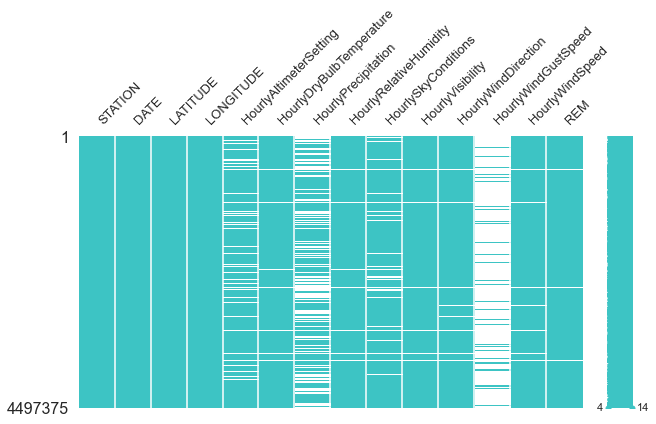

In [16]:
import missingno as msno

msno.matrix(LCD, figsize=(10, 5), color=(0.24, 0.77, 0.77), fontsize=13);

Missing values (`NaN`'s):
- By rows:
    - Some rows display a fair amount of missing values. Considering that we will simply drop them, since these records carry no useful information
- By column:
    - `HourlyPrecipitation`: best assumption is to fill with 0's, based on two factors:  
        - It is more conservative for our model
        - Considering the rest of the database records, it is fair to assume that null values correspond to no trace of precipitation
    - `HourlyAltimeterSetting`: explore imputation/interpolation
    - `HourlySkyConditions` and `REM`: fill with pseudo-empty strings (i.e. a single space ' ')

##### Quasi-empty rows

In [17]:
# Drop rows which mainly consist of NaN elements:
missingcols = [col for col in LCD.columns if col not in ['STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'REM']]
missingRows = len(LCD.dropna(axis=0, how='all', subset=missingcols))
print("Rows which are mainly empty: {:d} ({:5.2f}%)".format(len(LCD) - missingRows,
                                                          100 * (len(LCD) - missingRows) / len(LCD)))

Rows which are mainly empty: 135014 ( 3.00%)


In [18]:
# Since they account for 3% of the dataset, we will just drop them:
LCD.dropna(axis=0, how='all', subset=missingcols, inplace=True)
LCD.shape

(4362361, 14)

Check again the current status of the missing elements after cleaning:

In [19]:
# Absolute & Relative frequency of missing values by column:
pd.set_option('display.max_rows', LCD.shape[1])
missing = pd.DataFrame([LCD.isna().sum(), LCD.isna().sum() / len(LCD) * 100], index=['Absolute', 'Relative']).T.sort_values(by='Relative', ascending=False)
missing

,Absolute,Relative
HourlyWindGustSpeed,3838865.0,87.999709
HourlyPrecipitation,1338748.0,30.688611
HourlyAltimeterSetting,327293.0,7.502657
HourlySkyConditions,282195.0,6.468859
HourlyWindDirection,22728.0,0.521002
HourlyRelativeHumidity,15487.0,0.355014
HourlyWindSpeed,12508.0,0.286725
HourlyDryBulbTemperature,8142.0,0.186642
HourlyVisibility,6696.0,0.153495
REM,1286.0,0.029479


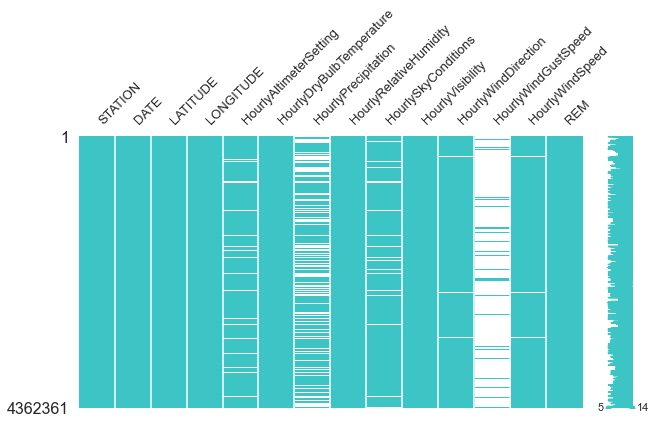

In [20]:
msno.matrix(LCD, figsize=(10, 5), color=(0.24, 0.77, 0.77), fontsize=13);

In [26]:
LCD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4362361 entries, 0 to 4497374
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   STATION                   int64  
 1   DATE                      object 
 2   LATITUDE                  float64
 3   LONGITUDE                 float64
 4   HourlyAltimeterSetting    object 
 5   HourlyDryBulbTemperature  object 
 6   HourlyPrecipitation       object 
 7   HourlyRelativeHumidity    object 
 8   HourlySkyConditions       object 
 9   HourlyVisibility          object 
 10  HourlyWindDirection       object 
 11  HourlyWindGustSpeed       object 
 12  HourlyWindSpeed           object 
 13  REM                       object 
dtypes: float64(2), int64(1), object(11)
memory usage: 499.2+ MB


There are some columns which one would have expected to be numeric:
- `HourlyAltimeterSetting`
- `HourlyDryBulbTemperature`
- `HourlyPrecipitation`
- `HourlyRelativeHumidity`
- `HourlyVisibility`
- `HourlyWindGustSpeed`
- `HourlyWindSpeed`

Therefore, let's have a deeper look at their values in order to check data coherency.

In [27]:
num_cols = [
'HourlyAltimeterSetting', 'HourlyDryBulbTemperature', 'HourlyPrecipitation', 'HourlyRelativeHumidity', 'HourlyVisibility',
'HourlyWindGustSpeed', 'HourlyWindSpeed'
]

In [28]:
for col in num_cols:
    print(col, "\n", LCD[col].unique())

HourlyAltimeterSetting 
 ['29.78' '29.73' nan '29.70' '29.69' '29.65' '29.64' '29.67' '29.68'
 '29.63' '29.66' '29.76' '29.82' '29.88' '29.87' '29.93' '29.99' '30.02'
 '30.05' '30.08' '30.11' '30.14' '30.15' '30.16' '30.17' '30.18' '30.20'
 '30.23' '30.24' '30.26' '30.29' '30.30' '30.32' '30.33' '30.27' '30.21'
 '30.19' '30.12' '30.09' '30.07' '30.04' '30.01' '29.97' '29.95' '29.91'
 '29.89' '29.90' '29.92' '29.96' '30.03' '30.00' '29.86' '29.84' '29.80'
 '29.79' '29.75' '29.74' '29.72' '29.71' '29.62' '29.59' '29.58' '29.56'
 '29.52' '29.51' '29.50' '29.49' '29.48' '29.46' '29.47' '29.54' '29.77'
 '29.81' '29.94' '30.06' '30.10' '30.28' '30.31' '30.35' '30.38' '30.40'
 '30.41' '30.42' '30.44' '30.47' '30.50' '30.52' '30.49' '30.45' '30.39'
 '30.37' '30.22' '30.13' '29.83' '29.57' '29.61' '29.85' '29.98' '30.34'
 '30.43' '30.48' '30.54' '30.56' '30.55' '30.46' '30.25' '30.36' '29.42'
 '29.39' '29.38' '29.36' '29.33' '29.30' '29.28s' '29.29' '29.32' '29.31'
 '29.34' '29.43' '29.53' '30.

HourlyRelativeHumidity 
 ['89.0' '86.0' '85.0' '93.0' '87.0' '90.0' '77.0' '60.0' '53.0' '49.0'
 '51.0' '50.0' '52.0' '54.0' '56.0' '58.0' '65.0' '62.0' '70.0' '73.0'
 '68.0' '76.0' '57.0' '63.0' '67.0' '79.0' '55.0' '64.0' '72.0' '75.0'
 '78.0' '81.0' '83.0' '80.0' '71.0' '74.0' '66.0' '44.0' '43.0' '41.0'
 '34.0' '38.0' '40.0' '45.0' '48.0' '46.0' '31.0' '29.0' '26.0' '28.0'
 '33.0' '61.0' '82.0' '42.0' '47.0' '59.0' '39.0' '36.0' '25.0' '30.0'
 '32.0' '37.0' '35.0' '69.0' '88.0' '84.0' '24.0' nan '92.0' '27.0' '22.0'
 '23.0' '21.0' '19.0' '18.0' '17.0' '20.0' '16.0' '15.0' '91.0' '94.0'
 '96.0' '100.0' '97.0' '14.0' '13.0' '12.0' '11.0' '10.0' '9.0' '8.0'
 '7.0' '6.0' '5.0' '95.0' '84' '90' '93' '88' '87' '74' '79' '71' '65'
 '62' '67' '91' '94' '96' '97' '83' '82' '76' '69' '66' '100' '78' '68'
 '61' '51' '47' '50' '53' '60' '64' '73' '77' '43' '40' '41' '48' '86'
 '89' '45' '36' '35' '33' '31' '58' '70' '72' '75' '85' '54' '42' '39'
 '80' '59' '81' '57' '46' '34' '32' '25' '22' '2

Observations:
- `HourlyAltimeterSetting`:
    - `nan`'s
    - "s" characters at the end of some values
- `HourlyDryBulbTemperature`
    - `nan`'s
    - "s" characters at the end of some values
    - " * " characters
- `HourlyPrecipitation`
    - `nan`'s
    - "s" characters at the end of some values
    - "T" character, which according to the documentation, it denotes "a trace amount of precipitation"
    - Mixed values such as '0.040.13s' or '0.05s0.01s' → treat these as `nan`s, since it is not easy to find which is correct
- `HourlyRelativeHumidity`
    - `nan`'s
    - " * " characters
- `HourlyVisibility`
    - `nan`'s
    - "s" and/or "V" characters at the end of some values
- `HourlyWindGustSpeed`
    - `nan`'s
    - "s" characters at the end of some values
    - " * " characters
- `HourlyWindSpeed`
    - `nan`'s
    - "s" characters at the end of some values
    - " * " characters

##### 1. `HourlyAltimeterSetting` column

- `HourlyAltimeterSetting`:
    - `nan`'s
    - "s" characters at the end of some values

In [29]:
# First we need to cast it to numeric type. However, we find some "s" at the end of some values; just get rid of them:
LCD['HourlyAltimeterSetting'] = LCD['HourlyAltimeterSetting'].str.replace('s', '')
LCD['HourlyAltimeterSetting'] = LCD['HourlyAltimeterSetting'].astype('float64')

In [30]:
LCD[LCD['HourlyAltimeterSetting'].isna()].head()

,STATION,DATE,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
2,72517014737,2019-01-01T01:00:00,40.64985,-75.44771,NaN,43.0,NaN,89.0,5,2.98,000,NaN,0.0,SYN09272517 17248 80000 10061 20044 39932 4007...
20,72517014737,2019-01-01T07:00:00,40.64985,-75.44771,NaN,50.0,NaN,89.0,5,6.84,230,NaN,18.0,SYN09272517 32261 82316 10100 20083 39908 4004...
29,72517014737,2019-01-01T13:00:00,40.64985,-75.44771,NaN,54.0,NaN,49.0,41,9.94,300,NaN,20.0,SYN08672517 32666 23017 10122 20017 39982 4011...
36,72517014737,2019-01-01T19:00:00,40.64985,-75.44771,NaN,46.0,NaN,56.0,57,9.94,280,NaN,7.0,SYN08072517 32766 62806 10078 21006 30059 4019...
44,72517014737,2019-01-02T01:00:00,40.64985,-75.44771,NaN,40.0,NaN,60.0,41,9.94,340,NaN,5.0,SYN08072517 32666 63404 10044 21028 30082 4022...


Since data is arranged according to date and time, let's examine a couple of examples; the rows immediately preceding and following the NaN ones.

In [31]:
LCD.loc[[1,2,3],:]

,STATION,DATE,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
1,72517014737,2019-01-01T00:51:00,40.64985,-75.44771,29.73,43.0,0.01,89.0,OVC:08 5,3.00,000,NaN,0.0,MET14401/01/19 00:51:02 METAR KABE 010551Z 000...
2,72517014737,2019-01-01T01:00:00,40.64985,-75.44771,NaN,43.0,NaN,89.0,5,2.98,000,NaN,0.0,SYN09272517 17248 80000 10061 20044 39932 4007...
3,72517014737,2019-01-01T01:10:00,40.64985,-75.44771,29.70,43.0,NaN,89.0,OVC:08 5,2.00,120,NaN,3.0,MET10501/01/19 01:10:02 SPECI KABE 010610Z 120...


In [32]:
LCD.loc[[19,20,21],:]

,STATION,DATE,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
19,72517014737,2019-01-01T06:51:00,40.64985,-75.44771,29.66,50.0,0.00,89.0,OVC:08 4,7.00,230,29.0,18.0,MET11901/01/19 06:51:02 METAR KABE 011151Z 230...
20,72517014737,2019-01-01T07:00:00,40.64985,-75.44771,NaN,50.0,NaN,89.0,5,6.84,230,NaN,18.0,SYN09272517 32261 82316 10100 20083 39908 4004...
21,72517014737,2019-01-01T07:05:00,40.64985,-75.44771,29.67,50.0,NaN,89.0,BKN:07 5 OVC:08 60,7.00,240,NaN,14.0,MET09201/01/19 07:05:02 SPECI KABE 011205Z 240...


Based on these results, it seems like **linear interpolation** may be reasonable in this case.

In [33]:
# Interpolation has been reviewed as a reasonable approach. Let's apply it:
LCD['HourlyAltimeterSetting'].interpolate(method='linear', axis=0, inplace=True)

##### 2. `HourlyDryBulbTemperature` column

- `HourlyDryBulbTemperature`
    - `nan`'s
    - "s" characters at the end of some values
    - " * " characters

In [34]:
# First we need to cast it to numeric type. However, we find some "s" at the end of some values; just get rid of them:
LCD['HourlyDryBulbTemperature'] = LCD['HourlyDryBulbTemperature'].str.replace('s', '')
# Similarly, we'll replace '*' by 'NaN's, since they both represent missing values:
LCD['HourlyDryBulbTemperature'] = LCD['HourlyDryBulbTemperature'].str.replace('*', 'NaN')
LCD['HourlyDryBulbTemperature'] = LCD['HourlyDryBulbTemperature'].astype('float64')
# Likewise, interpolation has been reviewed as a reasonable approach. Let's apply it:
LCD['HourlyDryBulbTemperature'].interpolate(method='linear', axis=0, inplace=True)

##### 3. `HourlyPrecipitation` column

- `HourlyPrecipitation`
    - `nan`'s
    - "s" characters at the end of some values
    - "T" character, which according to the documentation, it denotes "a trace amount of precipitation"
    - Mixed values such as '0.040.13s' or '0.05s0.01s' → treat these as `nan`s, since it is not easy to find which is correct

In [35]:
# First we need to cast it to numeric type. However, we find some "s" at the end of some values; just get rid of them:
LCD['HourlyPrecipitation'] = LCD['HourlyPrecipitation'].str.replace('s', '')
# Similarly, we'll replace 'T' by '0':
LCD['HourlyPrecipitation'] = LCD['HourlyPrecipitation'].str.replace('T', '0')
# Deal with "strange" values in the format of "0.010.03s":
LCD.loc[LCD[LCD['HourlyPrecipitation'].str.len() > 4].index, 'HourlyPrecipitation'] = '0'
LCD['HourlyPrecipitation'] = LCD['HourlyPrecipitation'].astype('float64')
# Following previous comments, NaN's will be replaced by 0 for this column:
LCD['HourlyPrecipitation'].fillna(0, inplace=True)

##### 4. `HourlyRelativeHumidity` column

- `HourlyRelativeHumidity`
    - `nan`'s
    - " * " characters

In [36]:
# First we need to cast it to numeric type. However, we'll replace '*' by 'NaN's, since they both represent missing values:
LCD['HourlyRelativeHumidity'] = LCD['HourlyRelativeHumidity'].str.replace('*', 'NaN')
LCD['HourlyRelativeHumidity'] = LCD['HourlyRelativeHumidity'].astype('float64')
# Likewise, interpolation has been reviewed as a reasonable approach. Let's apply it:
LCD['HourlyRelativeHumidity'].interpolate(method='linear', axis=0, inplace=True)

##### 5. `HourlyVisibility` column

- `HourlyVisibility`
    - `nan`'s
    - "s" and/or "V" characters at the end of some values

In [37]:
# First we need to cast it to numeric type. However, we find some "s" at the end of some values; just get rid of them:
LCD['HourlyVisibility'] = LCD['HourlyVisibility'].str.replace('s', '')
# Similarly, we'll replace also 'V':
LCD['HourlyVisibility'] = LCD['HourlyVisibility'].str.replace('V', '')
# Plus, we'll replace '*' by 'NaN's, since they both represent missing values:
LCD['HourlyVisibility'] = LCD['HourlyVisibility'].str.replace('*', 'NaN')
LCD['HourlyVisibility'] = LCD['HourlyVisibility'].astype('float64')
# Likewise, interpolation has been reviewed as a reasonable approach. Let's apply it:
LCD['HourlyVisibility'].interpolate(method='linear', axis=0, inplace=True)

##### 6. `HourlyWindGustSpeed` column

- `HourlyWindGustSpeed`
    - `nan`'s
    - "s" characters at the end of some values
    - " * " characters

In [41]:
# First we need to cast it to numeric type. However, we find some "s" at the end of some values; just get rid of them:
LCD['HourlyWindGustSpeed'] = LCD['HourlyWindGustSpeed'].str.replace('s', '')
# Similarly, we'll replace '*' by 'NaN's, since they both represent missing values:
LCD['HourlyWindGustSpeed'] = LCD['HourlyWindGustSpeed'].str.replace('*', 'NaN')
LCD['HourlyWindGustSpeed'] = LCD['HourlyWindGustSpeed'].astype('float64')
# The most reasonable approach to fill the empty values for this feature is by simply replacing them with null values:
LCD['HourlyWindGustSpeed'].fillna(0, inplace=True)

##### 7. `HourlyWindSpeed` column

- `HourlyWindSpeed`
    - `nan`'s
    - "s" characters at the end of some values
    - " * " characters

In [38]:
# First we need to cast it to numeric type. However, we find some "s" at the end of some values; just get rid of them:
LCD['HourlyWindSpeed'] = LCD['HourlyWindSpeed'].str.replace('s', '')
# Similarly, we'll replace '*' by 'NaN's, since they both represent missing values:
LCD['HourlyWindSpeed'] = LCD['HourlyWindSpeed'].str.replace('*', 'NaN')
LCD['HourlyWindSpeed'] = LCD['HourlyWindSpeed'].astype('float64')
# Likewise, interpolation has been reviewed as a reasonable approach. Let's apply it:
LCD['HourlyWindSpeed'].interpolate(method='linear', axis=0, inplace=True)

##### Aftermath check

Check again the current status of the missing elements after cleaning:

In [42]:
# Absolute & Relative frequency of missing values by column:
missing = pd.DataFrame([LCD.isna().sum(), LCD.isna().sum() / len(LCD) * 100], index=['Absolute', 'Relative']).T.sort_values(by='Relative', ascending=False)
missing

,Absolute,Relative
HourlySkyConditions,282195.0,6.468859
HourlyWindDirection,22728.0,0.521002
REM,1286.0,0.029479
STATION,0.0,0.000000
DATE,0.0,0.000000
LATITUDE,0.0,0.000000
LONGITUDE,0.0,0.000000
HourlyAltimeterSetting,0.0,0.000000
HourlyDryBulbTemperature,0.0,0.000000
HourlyPrecipitation,0.0,0.000000


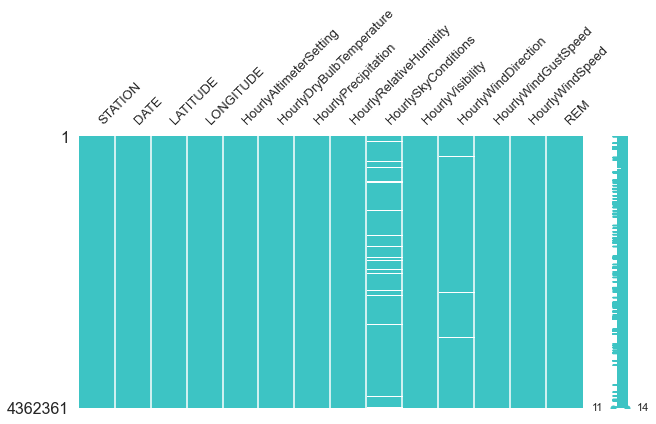

In [43]:
msno.matrix(LCD, figsize=(10, 5), color=(0.24, 0.77, 0.77), fontsize=13);

In [44]:
LCD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4362361 entries, 0 to 4497374
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   STATION                   int64  
 1   DATE                      object 
 2   LATITUDE                  float64
 3   LONGITUDE                 float64
 4   HourlyAltimeterSetting    float64
 5   HourlyDryBulbTemperature  float64
 6   HourlyPrecipitation       float64
 7   HourlyRelativeHumidity    float64
 8   HourlySkyConditions       object 
 9   HourlyVisibility          float64
 10  HourlyWindDirection       object 
 11  HourlyWindGustSpeed       object 
 12  HourlyWindSpeed           float64
 13  REM                       object 
dtypes: float64(8), int64(1), object(5)
memory usage: 659.2+ MB


There are some other columns which should stay as string (`object`), but still with some cleaning required:
- `HourlySkyConditions`:  
    - A report of each cloud layer (up to 3). Each layer given in the following format: **ccc:ll-xxx** where:
        - **ccc** = Coverage:
            - CLR (clear sky)
            - FEW (few clouds)
            - SCT (scattered clouds)
            - BKN (broken clouds)
            - OVC (overcast)
            - VV (obscured sky), 10 (partially obscured sky)
        Last layer used (*)
        -  **ll** = Layer amount given in eighths (aka “oktas”) → *Not used*
        - **xxx** = Cloud base height at lowest point of layer → *Not used*   

**NOTE**: Since up to 3 cloud layers can be reported, the **full state of the sky can best be determined by the** contraction given for the **last layer**
- `REM` → `NaN`'s should be treated as an empty string
- `HourlyWindDirection`:
    - `NaN`'s and `VRB`'s should both be treated as '000'

##### 1. `HourlySkyConditions` column

`NaN` values cannot be easily treated, since they are unevenly distributed. For the time being, this will be left as an *'(missing)'*.

In [45]:
# By use of RegEx, replace each element by its last coverage code (i.e. 'ccc'):
LCD['HourlySkyConditions'] = LCD['HourlySkyConditions'].str.extract(r'.*(CLR|FEW|SCT|BKN|OVC|VV).*')
# By applying the above instruction, every element which did not contain any of those tags has turned now into 'NaN':
LCD['HourlySkyConditions'].fillna('(missing)', inplace=True)
LCD['HourlySkyConditions'].value_counts()

OVC          1420639
CLR          1181996
BKN           571622
(missing)     481321
SCT           334350
FEW           307380
VV             65053
Name: HourlySkyConditions, dtype: int64

##### 2. `REM` column

In [46]:
# Following previous comments, NaN's will be replaced by '(missing)' for this column:
LCD['REM'].fillna('(missing)', inplace=True)

##### 3. `HourlyWindDirection` column

In [47]:
LCD['HourlyWindDirection'].unique()

array(['000', '120', '110', '180', '320', '300', '270', '230', '220',
       '210', '250', '240', '280', '290', '310', '330', 'VRB', '340',
       '030', '010', '080', '070', nan, '160', '140', '150', '170', '060',
       '090', '100', '040', '050', '260', '360', '020', '350', '130',
       '200', '190', '221', '081', '004', '251', '098', '006', '086',
       '058', '169', '071', '228', '242', '025', '108', '205', '119',
       '311', '229', '241'], dtype=object)

In the U.S., the criterion for a variable wind is: wind speed greater than 6 kt and direction varies by 60 degrees or more. If the wind is >1 kt but <6 kt, the wind direction may be replaced by **”VRB”** followed by the speed or reported as observed. “VRB” would be spoken as “wind variable at .”

<em>Reference: [ATC instructions given in PANS ATM Doc 4444, § 12.3.1.7a](https://aviation.stackexchange.com/questions/38528/what-are-the-criteria-for-variable-in-metar-reports#:~:text=In%20the%20U.S.%2C%20the%20criterion,as%20%E2%80%9Cwind%20variable%20at%20.%E2%80%9D)</em>

In [48]:
LCD['HourlyWindDirection'].replace('VRB', '000', inplace=True) # Note: A direction of “000” is given for calm winds
LCD['HourlyWindDirection'].fillna('000', inplace=True)

### Manipulate the data

In [49]:
LCD.sample(3)

,STATION,DATE,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
1688386,72757014916,2019-02-02T06:53:00,47.94280,-97.1839,29.90,3.0,0.0,83.0,OVC,7.0,360,0,11.0,MET10802/02/19 06:53:02 METAR KGFK 021253Z 360...
487967,72228013876,2019-11-17T18:53:00,33.56556,-86.7450,29.92,50.0,0.0,66.0,SCT,10.0,000,0,0.0,MET09511/17/19 18:53:01 METAR KBHM 180053Z 000...
332767,72254413958,2019-02-02T23:27:00,30.32080,-97.7604,30.01,62.0,0.0,96.0,OVC,3.0,000,0,3.0,MET08802/02/19 23:27:02 SPECI KATT 030527Z VRB...


#### Date/Time

In [50]:
# Cast the column to 'datetime64[ns]' dtype:
LCD['DATE'] = pd.to_datetime(arg=LCD['DATE'], format='%Y-%m-%dT%H:%M:%S')
# Create new columns for Date and Hour drawing upon the recently created column:
LCD.insert(loc=2, column='Date', value=LCD['DATE'].dt.date)
LCD.insert(loc=3, column='Hour', value=LCD['DATE'].dt.hour)
# For the sake of the merging process that awaits, it is best to simplify a bit;
# only the first record for each station, day and hour will be kept:
LCD.drop_duplicates(subset=['STATION', 'Date', 'Hour'], keep='first', inplace=True)

**Assumption:** The above solution entails throwing away potentially valuable data. This approach forces the model to lose accuracy in terms of time. By performing this, we give up weather readings that might be closer to our flights. However, this assumption of reducing the weather readings to the first one for each station-day-hour trinomial is essential. Otherwise, crossing references by future dataset-merging actions would become unworkable.

In [51]:
LCD.sample(3)

,STATION,DATE,Date,Hour,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
2897412,72248613942,2019-01-18 10:02:00,2019-01-18,10,32.51550,-92.04050,30.09,53.0,0.0,100.0,OVC,2.5,160,0,6.0,MET10601/18/19 10:02:02 SPECI KMLU 181602Z 160...
1651585,72665094023,2019-03-03 02:29:00,2019-03-03,2,44.33944,-105.54194,30.32,-11.0,0.0,78.0,OVC,6.0,320,0,6.0,MET09903/03/19 02:29:02 SPECI KGCC 030929Z 320...
4105867,72211512871,2019-01-26 03:53:00,2019-01-26,3,27.40139,-82.55861,30.18,51.0,0.0,56.0,SCT,10.0,040,0,7.0,MET09901/26/19 03:53:02 METAR KSRQ 260853Z 040...


#### Station: WMO-WBAN

In [52]:
# Since we will perform some pd.Series.str operations, we first need to cast the column to 'str' type:
LCD['STATION'] = LCD['STATION'].astype(str)
# We will keep the original code just in case; but in addition to it, we will split it into WMO and WBAN codes:
LCD.insert(loc=1, column='WMO', value=LCD['STATION'].str[:-5])
LCD.insert(loc=2, column='WBAN', value=LCD['STATION'].str[-5:])

In [53]:
LCD.sample(3)

,STATION,WMO,WBAN,DATE,Date,Hour,LATITUDE,LONGITUDE,HourlyAltimeterSetting,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySkyConditions,HourlyVisibility,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,REM
4144054,78543011640,785430,11640,2019-03-12 01:53:00,2019-03-12,1,18.33630,-64.98000,29.99,76.0,0.0,72.0,CLR,10.0,060,0,11.0,MET10803/12/19 01:53:02 METAR TIST 120553Z 060...
2594697,72252012907,722520,12907,2019-06-09 23:56:00,2019-06-09,23,27.53333,-99.46667,30.00,84.0,0.0,74.0,CLR,10.0,080,0,17.0,MET14506/09/19 23:56:02 METAR KLRD 100556Z 080...
4018541,72263023034,722630,23034,2019-10-13 01:51:00,2019-10-13,1,31.35160,-100.49500,30.02,51.0,0.0,64.0,CLR,10.0,010,0,3.0,MET09210/13/19 01:51:02 METAR KSJT 130751Z 010...


Check one last time the current status of the missing elements after cleaning:

In [54]:
# Absolute & Relative frequency of missing values by column:
pd.set_option('display.max_rows', LCD.shape[1])
missing = pd.DataFrame([LCD.isna().sum(), LCD.isna().sum() / len(LCD) * 100], index=['Absolute', 'Relative']).T.sort_values(by='Relative', ascending=False)
missing

,Absolute,Relative
STATION,0.0,0.0
WMO,0.0,0.0
HourlyWindSpeed,0.0,0.0
HourlyWindGustSpeed,0.0,0.0
HourlyWindDirection,0.0,0.0
HourlyVisibility,0.0,0.0
HourlySkyConditions,0.0,0.0
HourlyRelativeHumidity,0.0,0.0
HourlyPrecipitation,0.0,0.0
HourlyDryBulbTemperature,0.0,0.0


Great!! No missing values encountered.

### Save the cleaned DF into a new CSV file

In [55]:
output_csv_dir = os.path.join(root,
                              "Output_Data",
                              "NOAA",
                              "LCD_AllStations")
file_name = "LCD_all_clean_v2.csv"

if file_name not in os.listdir(output_csv_dir):
    # Save such DataFrame into a CSV file (only once):
    LCD.to_csv(path_or_buf=os.path.join(output_csv_dir, file_name),
               index=False,
               encoding='latin1')
else:    
    print("File '" + file_name + "' already exists.\nNo file has been generated (previous one remains).")

___

In [56]:
t1 = time.perf_counter() - t0
print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)

Time elapsed:  8070.2972964


___